In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Load the dataset
training_set = pd.read_csv("Datasets/Salary_dataset.csv")

# Display the first few rows of the dataset
print(training_set.head())

# Extracting the independent variable (Years of Experience) and dependent variable (Salary)
x_train = training_set.iloc[:, 1].values  
y_train = training_set.iloc[:, -1].values   

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


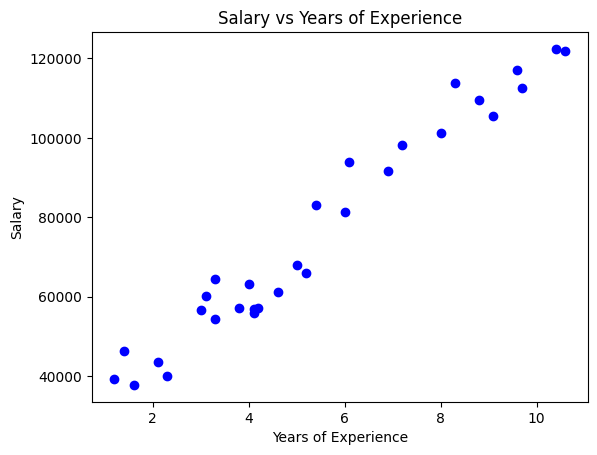

In [13]:
# Visualizing the dataset
plt.scatter(x_train, y_train, color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
# Cost function implementation
def cost_function(x, y, w, b):
    n = len(x)
    cost_sum = 0

    for i in range(n):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum += cost
    
    total_cost = cost_sum / (2 * n)
    return total_cost


In [15]:
# Gradient function implementation
def gradian_function(x, y, w, b):
    n = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(n):
        f = w * x[i] + b

        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/n) * dc_dw
    dc_db = (1/n) * dc_db

    return dc_dw, dc_db

In [16]:
# Gradient Descent implementation
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0

    for i in range(iterations):
        dc_dw, dc_db = gradian_function(x, y, w, b)

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        if i % 1000 == 0:
            cost = cost_function(x, y, w, b)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

    return w, b

In [17]:
# Hyperparameters
iterations = 10000
alpha = 0.01

final_w, final_b = gradient_descent(x_train, y_train, alpha, iterations)
print(f"Final weight (w): {final_w}, Final bias (b): {final_b}")

Iteration 0: Cost 1297963218.5636213, w 4850.044133333334, b 760.04
Iteration 1000: Cost 16536321.443972418, w 9879.928601219774, b 21918.621894264932
Iteration 2000: Cost 15650194.141004473, w 9504.92118565751, b 24473.740872888877
Iteration 3000: Cost 15635716.332722155, w 9456.987236888157, b 24800.339593709716
Iteration 4000: Cost 15635479.790035848, w 9450.86025552919, b 24842.085878455833
Iteration 5000: Cost 15635475.92533192, w 9450.077096587838, b 24847.421944334237
Iteration 6000: Cost 15635475.86218926, w 9449.97699216586, b 24848.104007402384
Iteration 7000: Cost 15635475.861157617, w 9449.964196684927, b 24848.191189614834
Iteration 8000: Cost 15635475.861140765, w 9449.962561149461, b 24848.20233336169
Iteration 9000: Cost 15635475.861140482, w 9449.962352093133, b 24848.2037577703
Final weight (w): 9449.962325379338, Final bias (b): 24848.203939785166


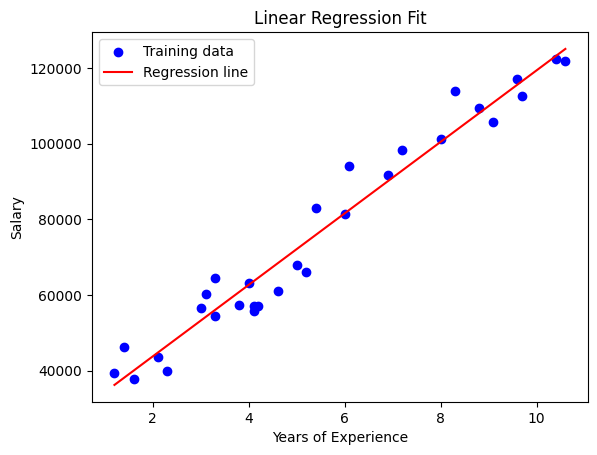

In [18]:
# Visualizing the regression line
plt.scatter(x_train, y_train, color='blue', label='Training data')

x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Regression line')

plt.title('Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [19]:
# Making prediction for a specific input
years_of_experience = 15.5
predicted_salary = final_w * years_of_experience + final_b
print(f"Predicted salary for {years_of_experience} years of experience: {predicted_salary:.2f}")

Predicted salary for 15.5 years of experience: 171322.62


In [20]:
from sklearn.linear_model import LinearRegression

# Reshape x_train for sklearn
x_train_reshaped = x_train.reshape(-1, 1)
lr_model = LinearRegression()
lr_model.fit(x_train_reshaped, y_train)
predicted_salary_sklearn = lr_model.predict(np.array([[years_of_experience]]))
print(f"Predicted salary using scikit-learn for {years_of_experience} years of experience: {predicted_salary_sklearn[0]:.2f}")

Predicted salary using scikit-learn for 15.5 years of experience: 171322.62
